In [1]:
!unzip saved_model.zip -d saved_model

Archive:  saved_model.zip
   creating: saved_model/content/saved_model/
  inflating: saved_model/content/saved_model/saved_model.pb  
  inflating: saved_model/content/saved_model/keras_metadata.pb  
   creating: saved_model/content/saved_model/assets/
   creating: saved_model/content/saved_model/variables/
  inflating: saved_model/content/saved_model/variables/variables.data-00000-of-00001  
  inflating: saved_model/content/saved_model/variables/variables.index  
 extracting: saved_model/content/saved_model/fingerprint.pb  


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model, Model

model = keras.models.load_model("saved_model/content/saved_model")

In [2]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("dense_1").output)
feature_extractor.trainable = False

In [13]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from emnist import extract_training_samples
images, labels = extract_training_samples('digits')
images.shape

(240000, 28, 28)

In [4]:
labels.shape

(240000,)

In [5]:
x_train = images[0:200000]
x_test = images[200000:]
# x_train.shape
x_test.shape
y_train = labels[0:200000]
y_test = labels[200000:]

In [6]:
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test_float = x_test_reshaped.astype("float32") / 255.0

x_test_float.shape

(40000, 28, 28, 1)

In [7]:
x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train_float = x_train_reshaped.astype("float32") / 255.0

x_train_float.shape

(200000, 28, 28, 1)

In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
model_emnist = tf.keras.Sequential([
    feature_extractor,
    Dense(256, activation='relu'),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

y_test_ohe.shape, y_train_ohe.shape

((40000, 10), (200000, 10))

In [12]:
model_emnist.compile(loss='categorical_crossentropy', optimizer='adam')
model_emnist.fit(x_train_float, y_train_ohe, epochs=2, batch_size=512)

Epoch 1/2
391/391 [==============================] - 4s 6ms/step - loss: 1.3797
Epoch 2/2
391/391 [==============================] - 3s 6ms/step - loss: 1.3572


In [13]:
predictions = model_emnist.predict(x_test_float)

1250/1250 [==============================] - 3s 2ms/step


In [14]:
import numpy as np

In [25]:
print(np.argmax(predictions[2111]))

7


In [23]:
import matplotlib.pyplot as plt

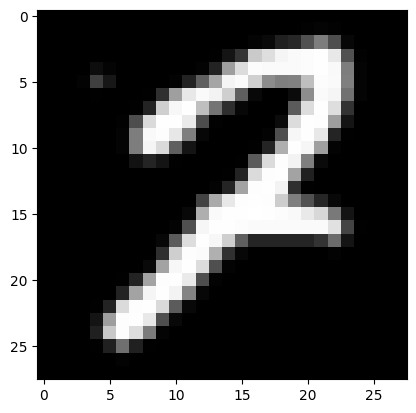

In [26]:
plt.imshow(x_test_float[2111].reshape(28,28), cmap='gray')